# Ejemplo 3.12

## Links de interes
- Ejemplo 3.12 hecho por Juan: https://gitlab.com/ingenieriabiologica/ense/senales_y_sistemas/-/blob/master/teorico/06_serie_fourier/serie_fourier_ejemplo_3_12.py
- Link a la clase: https://docs.google.com/document/d/1aSJGwGiItWV2veCyyBQULnKvL1MJdo9V7DPTk9RoHLU/edit


Equivale al ejemplo 3.5 pero en tiempo discreto.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Construcción de la señal- cálculo y gráfico de los coeficientes de Fourier

C:\Users\Ing. Biologica\AppData\Local\Temp\ipykernel_17776\3609566535.py:15: RuntimeWarning: invalid value encountered in true_divide
  ak = (1/N) * np.sin((N1 + 0.5) * 2 * np.pi * (1 / N) * k) / np.sin(np.pi * k * (1/N))   # Fórmula teórica obtenida


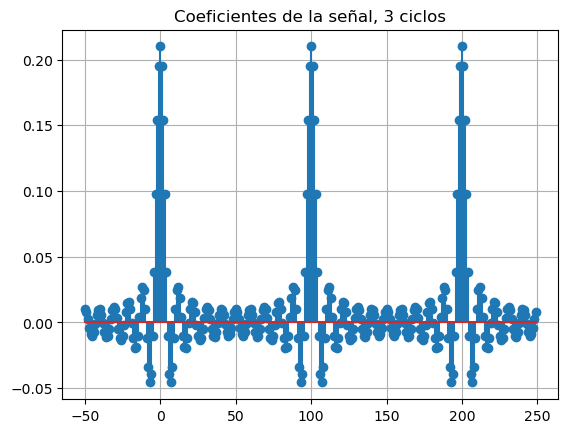

In [6]:
# Me defino la senal
N = 100    # Periodo. ELEGIR UN VALOR PAR
N1 = 10     # Cantidad de coef a la derecha e izquierda

N_m = N/2  

# Construccion del eje de frecuencia
ciclos_f = 3     # Cantidad de ciclos en frecuencia que quiero ver. Para reconstruir tengo que usar solo un ciclo de estos (despues uso rango_recons)

if(ciclos_f == 1):
    k = np.arange(-N_m, N_m)  # El período de los coeficientes es N también, entonces miro solo en este período si cant_ciclos = 1    
else:
    k = np.arange(-N_m, (2 * ciclos_f - 1) * N_m)  # Arranco de -N_m para que no me quede el primer ciclo cortado
    
ak = (1/N) * np.sin((N1 + 0.5) * 2 * np.pi * (1 / N) * k) / np.sin(np.pi * k * (1/N))   # Fórmula teórica obtenida

for i in range(0, ciclos_f):      # Le asigno "a mano" el valor de k=0 y sus multiplos
    ak[int((2 * i + 1) * (N/2))] = (2 * N1 + 1) / N 
plt.figure()
plt.plot(k, ak, '.')
plt.stem(k, ak)
plt.title('Coeficientes de la señal, ' + str(ciclos_f) + ' ciclos')
plt.grid()
plt.xlabel('k')
plt.ylabel('Amplitud')

Ahora voy a trabajar con un ciclo solo, para facilitar la visualización y luego la reconstrucción (recordar que esta debe hacerse solo con un ciclo).

C:\Users\Ing. Biologica\AppData\Local\Temp\ipykernel_17776\640027067.py:8: RuntimeWarning: invalid value encountered in true_divide
  ak = (1/N) * np.sin((N1 + 0.5) * 2 * np.pi * (1 / N) * k) / np.sin(np.pi * k * (1/N))   # Fórmula teórica obtenida


Text(0, 0.5, 'Amplitud')

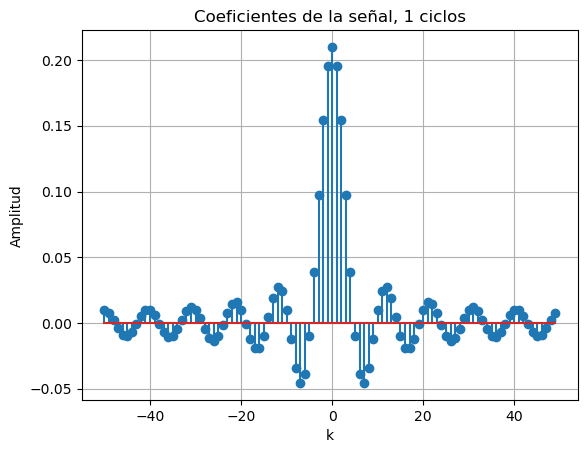

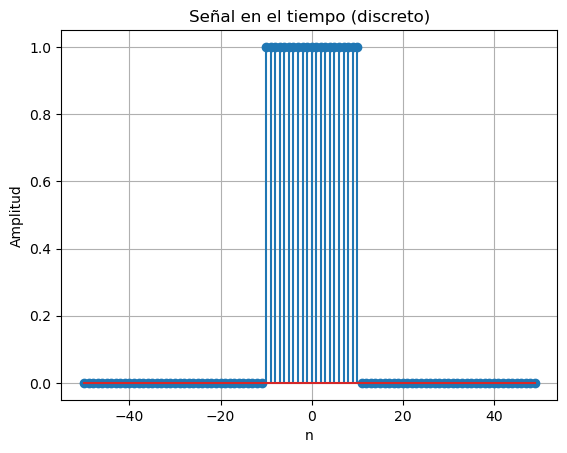

In [10]:
ciclos_f = 1     # Cantidad de ciclos en frecuencia que quiero ver. Para reconstruir tengo que usar solo un ciclo de estos (despues uso rango_recons)

if(ciclos_f == 1):
    k = np.arange(-N_m, N_m)  # El período de los coeficientes es N también, entonces miro solo en este período si cant_ciclos = 1    
else:
    k = np.arange(-N_m, (2 * ciclos_f - 1) * N_m)  # Arranco de -N_m para que no me quede el primer ciclo cortado
    
ak = (1/N) * np.sin((N1 + 0.5) * 2 * np.pi * (1 / N) * k) / np.sin(np.pi * k * (1/N))   # Fórmula teórica obtenida

for i in range(0, ciclos_f):      # Le asigno "a mano" el valor de k=0 y sus multiplos
    ak[int((2 * i + 1) * (N/2))] = (2 * N1 + 1) / N 
plt.figure()
plt.plot(k, ak, '.')
plt.stem(k, ak)
plt.title('Coeficientes de la señal, ' + str(ciclos_f) + ' ciclos')
plt.grid()
plt.xlabel('k')
plt.ylabel('Amplitud')

# Construccion de la senal de entrada para el caso puntual de 1 ciclo
entrada = np.zeros(N)
entrada[int(N_m - N1) : int(N_m + N1 + 1)] = 1

plt.figure()
plt.plot(k[0:N], entrada, '.')
plt.stem(k[0:N], entrada)
plt.title('Señal en el tiempo (discreto)')
plt.grid()
plt.xlabel('n')
plt.ylabel('Amplitud')

Es un buen momento para hacer una comparación con el resultado obtenido en el Ejemplo 3.5. Se puede ver que la forma es muy similar.

## Reconstrucción
Ahora procedemos hacer la reconstrucción de la señal de entrada, usando la ecuación de síntesis:

$
x_{r}[n] = \sum_{k = <N>}^{}a_{k}e^{jk\omega_{0}n}
$


C:\Users\Ing. Biologica\AppData\Local\Temp\ipykernel_17776\2027312017.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  xr[i] = np.dot(ak, aux_exp)                # producto interno


Text(0, 0.5, 'Amplitud')

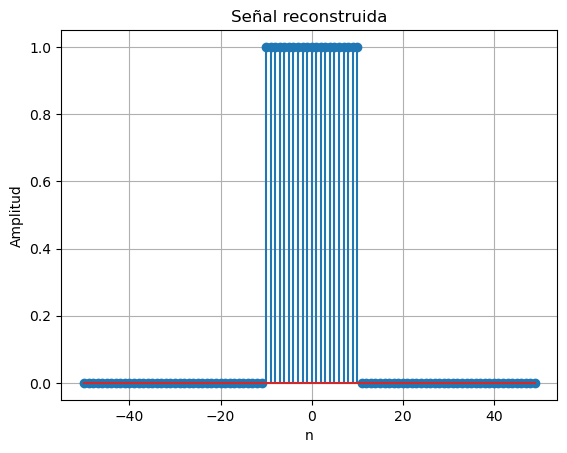

In [36]:
ciclos_t = 1    # Cantidad de ciclos en el tiempo que quiero reconstruir

n_rec = np.arange(-N_m, (2*ciclos_t) * N_m - N_m)   # Como estoy trabajando en discreto, el paso lo dejo en 1 
        
xr = np.zeros_like(n_rec)

for i in range(len(n_rec)):      # recorro el eje de tiempo. en cada iteracion calculo xr(t_i)
    n_i = n_rec[i]
    # Una vez definido el instante en el que voy a reconstruir la senal, procedo a hacer la sumatoria en k
    # Esta hecho de dos manera, ambas funcionan
    if 1:
        aux_exp = np.exp(1j*k*2*np.pi*(1/N)*n_i)
        xr[i] = np.dot(ak, aux_exp)                # producto interno
    if 0:
        aux = 0
        for j in range(len(k)):
            aux += ak[j] * np.exp(1j*k[j]*2*np.pi*(1/N)*n_i)
        xr[i] = aux
    
plt.figure()
plt.stem(n_rec, xr)
plt.title('Señal reconstruida')
plt.grid()
plt.xlabel('n')
plt.ylabel('Amplitud')

Se puede ver que es idéntica a la señal de la cu